<a href="https://colab.research.google.com/github/MCPMAlf/An-lisis-de-Datos/blob/main/Proyecto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importa paquetes necesarios
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from scipy.integrate import odeint
import scipy.optimize as optimize

from scipy.interpolate import lagrange

In [2]:
#Lectura de datos
Datos = pd.read_csv('/content/Puebla_pos.csv')

Datos = Datos.drop(columns = ['Unnamed: 0'])

#Vizualizacion de los datos
Datos.head()



,FECHA_SINTOMAS,positivo
0,2020-03-02,1
1,2020-03-05,2
2,2020-03-08,3
3,2020-03-09,4
4,2020-03-10,3


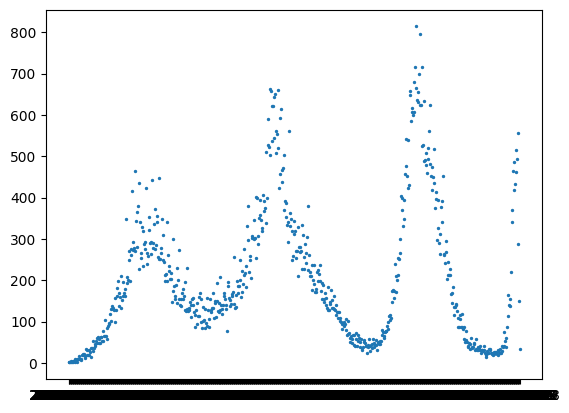

In [3]:
#Graficar los datos. Eje horizontal representa las fechas; el eje vertical representa el número de infectados en dicha fecha.
plt.scatter(Datos['FECHA_SINTOMAS'], Datos['positivo'], s = 2)

In [4]:
#Creación de columna con datos acumulados de los positivos.
Acumulado = Datos['positivo'].copy()

for i in range(1, len(Datos['positivo'])):
  Acumulado[i] = Acumulado[i-1] + Acumulado[i]

Datos['Positivos_acumulados'] = Acumulado

Datos

,FECHA_SINTOMAS,positivo,Positivos_acumulados
0,2020-03-02,1,1
1,2020-03-05,2,3
2,2020-03-08,3,6
3,2020-03-09,4,10
4,2020-03-10,3,13
...,...,...,...
673,2022-01-09,493,139030
674,2022-01-10,556,139586
675,2022-01-11,287,139873
676,2022-01-12,149,140022


Notas para primera ola: Falta ordenar por semana y tomar la semana como tiempo.
Usar el codigo de regresión para solucionar el modelo primero con parámetros elegidos sin noción.
Ajustar los parámetros usando curve_fit/Minimize.

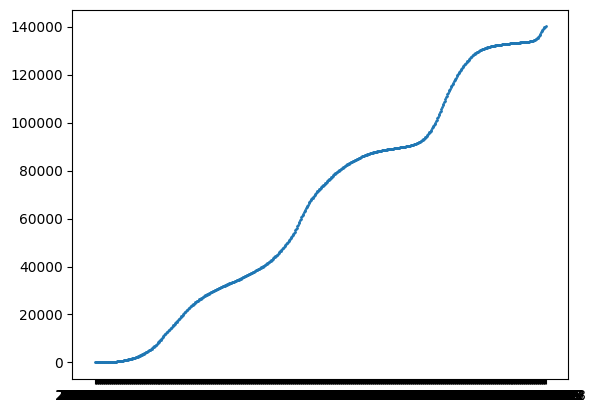

In [5]:
#Graficar los datos. Eje horizontal representa las fechas; el eje vertical representa el número de infectados acumulados en dicha fecha.
plt.scatter(Datos['FECHA_SINTOMAS'], Datos['Positivos_acumulados'], s = 1)

In [6]:
#Creación de columna que contiene como datos las semanas que han transcurrido.
from datetime import datetime
import math

FechaSintomas_string = Datos['FECHA_SINTOMAS']

FechaSintomas_string = pd.to_datetime(FechaSintomas_string)
Semana_Sintomas = []

for i in range(len(Datos['FECHA_SINTOMAS'])):
  Semana_Sintomas.append((math.trunc(FechaSintomas_string[i].day/7) + 1))
  
  #if FechaSintomas_string[i].month != FechaSintomas_string[i].month

print(Semana_Sintomas)

print(len(Semana_Sintomas))
print(len(Datos['FECHA_SINTOMAS']))

Prueba = Semana_Sintomas.copy()
Acumulado = 0


for i in range(0, len(Semana_Sintomas)-1):

  Semana_Sintomas[i] = Semana_Sintomas[i] + Acumulado

  if (FechaSintomas_string[i].month != FechaSintomas_string[i+1].month) | (FechaSintomas_string[i].year != FechaSintomas_string[i+1].year)  :
    Acumulado = Semana_Sintomas[i]

if (FechaSintomas_string[len(Semana_Sintomas)-1].month != FechaSintomas_string[len(Semana_Sintomas)-2].month) | (FechaSintomas_string[len(Semana_Sintomas)-1].year != FechaSintomas_string[len(Semana_Sintomas)-2].year) :
  Prueba[len(Semana_Sintomas)-1] = Semana_Sintomas[len(Semana_Sintomas)-1] + Semana_Sintomas[len(Semana_Sintomas)-2]

else :
  Semana_Sintomas[len(Semana_Sintomas)-1] =  Semana_Sintomas[len(Semana_Sintomas)-2]
    

Datos['Semana'] = Semana_Sintomas

Datos['Semana']






[1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 1, 1, 

0        1
1        1
2        2
3        2
4        2
      ... 
673    112
674    112
675    112
676    112
677    112
Name: Semana, Length: 678, dtype: int64

In [65]:
Datos

,FECHA_SINTOMAS,positivo,Positivos_acumulados,Semana
0,2020-03-02,1,1,1
1,2020-03-05,2,3,1
2,2020-03-08,3,6,2
3,2020-03-09,4,10,2
4,2020-03-10,3,13,2
...,...,...,...,...
673,2022-01-09,493,139030,112
674,2022-01-10,556,139586,112
675,2022-01-11,287,139873,112
676,2022-01-12,149,140022,112


In [106]:
Acumulado_Semana = np.array(Datos.iloc[:,[1,3]].groupby('Semana').sum())

for i in range(1, len(Acumulado_Semana)):
  Acumulado_Semana[i] = Acumulado_Semana[i-1] + Acumulado_Semana[i]

Acumulado_Semana = Acumulado_Semana.T.reshape(112,)
Semanas = np.array(Datos['Semana'].unique())

Acumulado_Semana


array([     3,     17,     58,    138,    213,    359,    570,    916,
         1325,   1506,   1998,   2843,   3895,   5022,   5726,   7197,
         9192,  11729,  13700,  14556,  16420,  18614,  20948,  22900,
        23771,  25229,  26613,  27965,  29059,  29638,  30512,  31428,
        32349,  33111,  33428,  34187,  35152,  36207,  37195,  37697,
        38670,  39866,  41192,  42641,  43390,  45001,  47116,  49616,
        52148,  53923,  57481,  61545,  65368,  68393,  69712,  71884,
        73910,  75884,  77701,  78005,  79510,  80894,  82366,  83546,
        84101,  85013,  85979,  86767,  87403,  87647,  88056,  88454,
        88823,  89128,  89273,  89527,  89844,  90220,  90713,  90983,
        91746,  93075,  95162,  98082,  99929, 103640, 108413, 113026,
       116611, 118668, 121603, 124240, 126665, 128439, 129077, 130103,
       130959, 131647, 132067, 132234, 132504, 132766, 132995, 133159,
       133258, 133397, 133574, 133837, 134395, 135048, 137559, 140055])

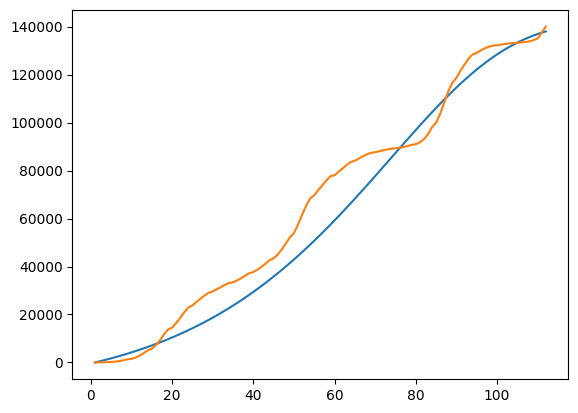

112

In [265]:
g_Inicial, b_Inicial = 405.056999909218, 405.091000100108500178
#Definición del modelo
def SIR(y,t):

	beta = b_Inicial
	gamma = g_Inicial
	
	S=y[0]
	I=y[1]
	A=y[2]

	N=S+I
	
	dS = -beta * S*I/N
	dI = beta * S*I/N - gamma*I
	#dR = gamma*I
	dA = beta * S*I/N

	return np.array([dS,dI,dA])

sol = odeint(SIR, [142000,1,1], Semanas)

#plt.plot(Semanas,sol[:,0])
#plt.plot(Semanas,sol[:,1])
plt.plot(Semanas,sol[:,2])
plt.plot(Semanas,Acumulado_Semana)
plt.show()

len(Acumulado_Semana)
 

# ***Primera ola: Mínimos y odeint***

In [266]:
def Fun(t,gamma,beta):

  #Definición del modelo
  def SIR_Mod(y,t):
    S=y[0]
    I=y[1]
    A=y[2]

    N=S+I
    
    dS = -beta * S*I/N
    dI = beta * S*I/N - gamma*I
    #dR = gamma*I
    dA = beta * S*I/N

    return np.array([dS,dI,dA])

  Sol_Mod = odeint(SIR_Mod,[142000,1,1],t)

  return Sol_Mod[:,2]

  #Parámteros Gama y Beta iniciales
#g_Inicial, b_Inicial = 0.4, 0.2

#Solución del sistema usando odeint
Parametros_Aprox, cov = optimize.curve_fit(Fun, Semanas, Acumulado_Semana)
print(Parametros_Aprox)
gamma_Aprox, beta_Aprox = Parametros_Aprox


[-0.53341539  0.02216095]


<ipython-input-266-4f437a7bd8b7>:12: RuntimeWarning: overflow encountered in double_scalars
  dI = beta * S*I/N - gamma*I
<ipython-input-266-4f437a7bd8b7>:11: RuntimeWarning: invalid value encountered in double_scalars
  dS = -beta * S*I/N
<ipython-input-266-4f437a7bd8b7>:12: RuntimeWarning: invalid value encountered in double_scalars
  dI = beta * S*I/N - gamma*I
<ipython-input-266-4f437a7bd8b7>:14: RuntimeWarning: invalid value encountered in double_scalars
  dA = beta * S*I/N


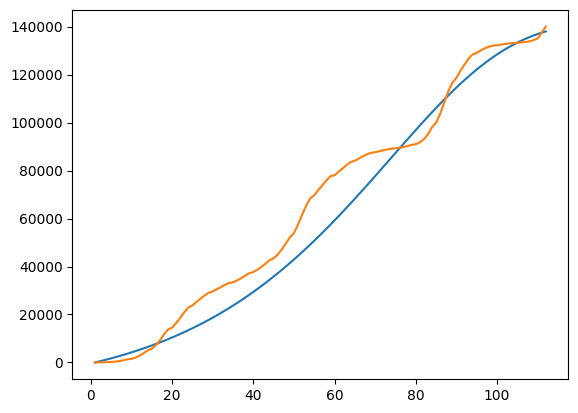

In [267]:
gamma_Aprox, beta_Aprox = Parametros_Aprox

#Definición del modelo
def SIRModel_fitted(y,t):
	
	S=y[0]
	I=y[1]
	A=y[2]

	N=S+I
	
	dS = -beta_Aprox * S*I/N
	dI = beta_Aprox * S*I/N - gamma_Aprox*I
	#dR = gamma*I
	dA = beta_Aprox * S*I/N

	return np.array([dS,dI,dA])

Sol = odeint(SIRModel_fitted,[142000,2,2], Semanas)

plt.plot(Semanas, sol[:,2])
plt.plot(Semanas, Acumulado_Semana)
plt.show()


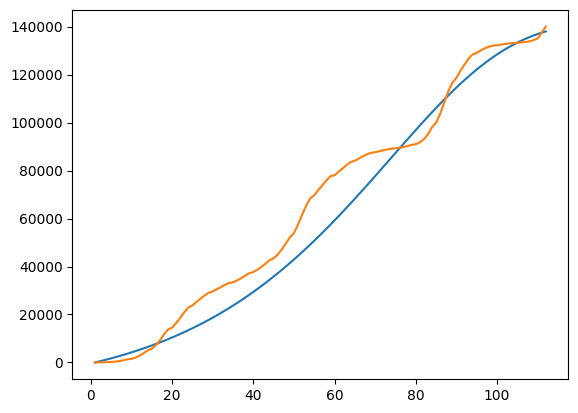

In [269]:
#plt.plot(Semanas,sol[:,0])
#plt.plot(Semanas,sol[:,1])
plt.plot(Semanas,sol[:,2])
plt.plot(Semanas,Acumulado_Semana)
plt.show()

# ***Segunda ola: Monte Carlo***